<a href="https://colab.research.google.com/github/MMoronto/pytorch_exercises/blob/master/Pytorch_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Fundamentals**

In [1]:
import torch
torch.__version__

'1.13.1+cu116'

Creating tensors

In [2]:
# Create a scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
# Get the Python number within a one-element tensor
scalar.item()

7

In [5]:
# Create a vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [6]:
#check the number of dimensions of vector
vector.ndim

1

In [7]:
# Check shape of vector
vector.shape

torch.Size([2])

In [8]:
# Matrix
matrix = torch.tensor([[7, 8],
                      [9, 10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
matrix.ndim

2

In [10]:
matrix.shape

torch.Size([2, 2])

In [11]:
# Let's make a tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

In [14]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.4108, 0.1916, 0.4442, 0.2636],
         [0.9640, 0.1254, 0.7584, 0.6557],
         [0.3379, 0.9195, 0.7229, 0.0346]]), torch.float32)

In [15]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [16]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]), torch.float32)

In [17]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]), torch.float32)

In [18]:
# Use torch.arange(). 
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
# Create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # Defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # Defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [21]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

In [22]:
# create a tensor and find out details about it
some_tensor = torch.rand(3, 4)

# Find out details about the tensor
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.1155, 0.7918, 0.7722, 0.2527],
        [0.5609, 0.8176, 0.3005, 0.0864],
        [0.3020, 0.4250, 0.2869, 0.3467]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [23]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.long)
int_32_tensor

tensor([3, 6, 9])

In [24]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

## **Tensor Ops**

In [25]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [26]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [27]:
# Tensors don't change unless they are reassigned
tensor

tensor([1, 2, 3])

In [28]:
# Subtract and reassign
tensor = tensor - 10
tensor 

tensor([-9, -8, -7])

In [29]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [30]:
# Use built-in pytorch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [31]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

In [32]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [33]:
# Element-wise multiplication and matrix multiplication
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape 

torch.Size([3])

In [34]:
# Element-wise and matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [35]:
# Matrix multiplicatiion
torch.matmul(tensor, tensor)


tensor(14)

In [36]:
# A not so recommended symbol for matrix multiplication
tensor @ tensor

tensor(14)

In [37]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 619 µs, sys: 0 ns, total: 619 µs
Wall time: 627 µs


tensor(14)

In [38]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 41.2 µs


tensor(14)

In [39]:
# # inner dimensions need to match for matrix multiplication to work
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

# torch.matmul(tensor_A, tensor_B) # this won't work because the inner dimensions don't match

In [40]:
# When inner dimensions don't match, you can use the transpose function to enable the multiplication work
print(tensor_A)
print(tensor_B.T)

print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [41]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

In [42]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [43]:
# Find max, min, sum, etc. (aggregation)
print(f"Minumum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this gives us an error
print(f"Mean: {x.type(torch.float32).mean()}") # wont work w/o float datatype
print(f"Sum: {x.sum()}")

Minumum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [44]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

In [45]:
#Positional min/max

#create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Return index of max & min vals
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")



Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


In [46]:
# Change tensor datatype

#create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [47]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [48]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

In [49]:
# RESHAPING, STACKING, SQUEEZING & UNSQUEEZING

#create a tensor
import torch

x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [50]:
# Let's add an extra dimension w/ torch.reshape()

#Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [51]:
# Let's change the view with torch.view()

#Change view (keeps same data as original but changes view)
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [52]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [53]:
# Stack tensors on top of each other five times
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [54]:
# try changing dim to dim=1
x_stacked = torch.stack([x, x, x, x], dim=1) 
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [55]:
#removing all single dimensions from a tensor

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Rename extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


In [56]:
# adding a dimension value of 1 at a specific index
# torch.unsqueeze()

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")


Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [57]:
# Create tensor w/ specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [58]:
# Indexing (selecting data from tensors)

#Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [59]:
#How to index bracket by bracket
#indexing vals goes from outer dimension -> inner dimension

print(f"First square bracket: \n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [60]:
# Index the middle bracket
x[0, 0], x[0][0]

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [61]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [62]:
# Get all values of 0th & 1st dimension but only the index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [63]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [64]:
# Get index 0 of 0th and last dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

**PYTORCH TENSORS & **NUMPY**

In [65]:
# Numpy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
# tensor = torch.from_numpy(array) .type(torch.float32)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [66]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

If you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`

In [67]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [68]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [69]:
# Reproducability

import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.1647, 0.2455, 0.5375, 0.5695],
        [0.0806, 0.7770, 0.7864, 0.2938],
        [0.2763, 0.0304, 0.8945, 0.4906]])

Tensor B:
tensor([[0.7486, 0.3857, 0.4812, 0.5363],
        [0.8490, 0.6631, 0.2430, 0.0372],
        [0.8038, 0.9014, 0.4542, 0.4177]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [70]:
# To make random but reproducible tensors
import torch
# Set the random seed
RANDOM_SEED=45
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# HAve to reset the seed every time a new rand() is called
# W/O this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) 
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor_C equal Tensor_D?(anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Tensor D:
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])

Does Tensor_C equal Tensor_D?(anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi`

In [71]:
#check if you've got access to a Nvidia GPU
!nvidia-smi

Thu Jan 19 22:10:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Getting PyTorch to run on the GPU

In [72]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [73]:
# Create a device variable to store what kind of device is available.

#Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [74]:
# Count number of devices
torch.cuda.device_count()

1

**Putting tensors (and models) on the GPU**

You can put tensors on a specific device by calling to

*   List item
*   List item

(device) on them.

In [75]:
# creating a tensor and putting it on the GPU (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

**Moving tensors back to the CPU**

In [76]:
# If tensor is on GPU, can't transform it to NumPy (will give error)

# tensor_on_gpu.numpy()

Instead, to get a tensor back to CPU and usable with NumPy we can use `Tensor.cpu()`.



In [77]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [78]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

# **PyTorch Workflow Fundamentals**

In [79]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1+cu116'

# Data Prep & Loading

In [80]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split data into training and test sets

Before we build a modelthat can learn the relationship between x (features) and y (labels), we need to split our data into a training and a test set(& when needed, a validation set).

In [81]:
# Create train/test split
train_split = int(0.8 * len(x)) # 80% of data used for training set, 20% for testing set
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

Create a function to visualize data

In [82]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data, test data & compares predictions
  """
  plt.figure(figsize=(10, 7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

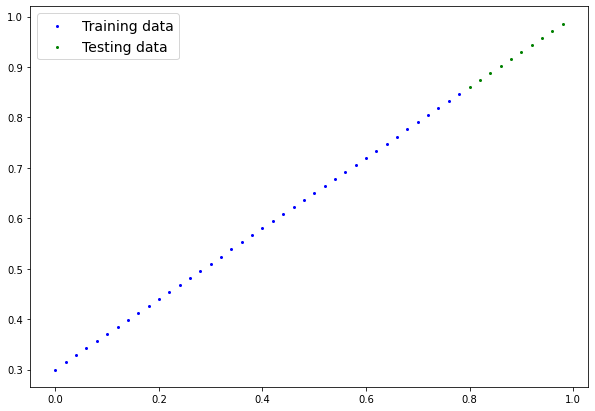

In [83]:
plot_predictions();

# Build Model

We'll build a model to use the blue dots to predict the green dots.

Let's start by replicating a standard linear regression model using pure PyTorch.

In [84]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?)

    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch defaults to float32
                             requires_grad=True) # <- can we update this value with gradient descent?))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
      return self.weights * x * self.bias # <- this is the linear regression formula (y = m*x + b)

create a model instance with the class we've made & check it's parameters using `.parameters()`

In [85]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can get the state(i.e. the content of the model) of the model using `.stat_dict()`

In [86]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making Predictions using `torch.inference_mode()`

TO check this we can pass in the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.

In [87]:
# Make predictions with model
with torch.inference_mode():  # this is a context manager--we use it to make predictions(i.e. inference)
  y_preds = model_0(x_test)

In [88]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.0347],
        [0.0356],
        [0.0364],
        [0.0373],
        [0.0382],
        [0.0390],
        [0.0399],
        [0.0408],
        [0.0416],
        [0.0425]])


 Let's visualize our predictions with the `plot_predictions()` function we created above.

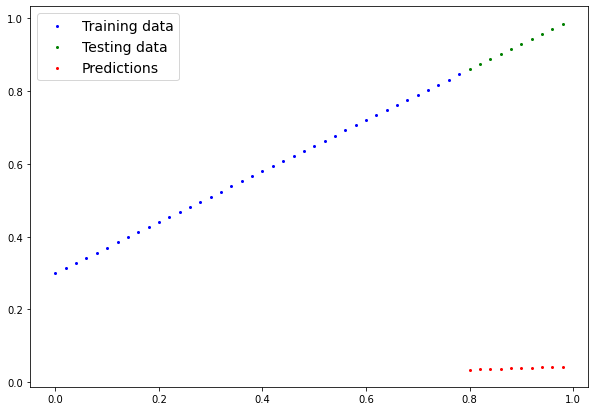

In [89]:
plot_predictions(predictions=y_preds)

In [90]:
y_test - y_preds

tensor([[0.8253],
        [0.8384],
        [0.8516],
        [0.8647],
        [0.8778],
        [0.8910],
        [0.9041],
        [0.9172],
        [0.9304],
        [0.9435]])

Our predictions look pretty bad since our model is just using random parameter values to make predictions. It needs to look at the blue dots to try to predict the green dots. We do this by training our model.

# 3. Train model

Right now our model is using random parameters to make calculations. It's guessing blindly.

To fix that we can update its internal params/patterns, the weights & bias values we set randomly using `nn.Parameter()` & `torch.randn()` to be something that better represents the data.

Most times we won't know what the ideal params are for a model, instead we write code to see if the model can try & figure them out itself.

## Creating a loss function and optimizer in PyTorch

For our model to update its params on its own, we'll need to add a **loss function** & an **optimizer** to it.


**Loss function**	Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). The Lower the better.	

PyTorch has plenty of built-in loss functions in torch.nn.	

Some common loss function values are: Mean absolute error (MAE) for regression problems (`torch.nn.L1Loss()`). Binary cross entropy for binary classification problems (`torch.nn.BCELoss()`).

**Optimizer**	Tells your model how to update its internal parameters to best lower the loss.

You can find various optimization function implementations in `torch.optim`.

Some common optimizer values are: Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).

Lets create a loss function & an optimizer we can use to improve out model.

In [91]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

## Creating an optimization loop in PyTorch

The next step is to create a training and a testing loop for our model.

The training loop involves the model going through the training data and learning the relationships between the `features` and `labels`.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data(the model never sees the testing data during training).

We'll use a Python `for` loop to accomplish this step.

In [92]:
torch.manual_seed(42)

# Set the number of epochs (the number of times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calc the loss (how diff are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Calc loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.5560861229896545 | MAE Test Loss: 0.8839500546455383 
Epoch: 10 | MAE Train Loss: 0.5540589094161987 | MAE Test Loss: 0.8792990446090698 
Epoch: 20 | MAE Train Loss: 0.5519170761108398 | MAE Test Loss: 0.8743834495544434 
Epoch: 30 | MAE Train Loss: 0.5496475696563721 | MAE Test Loss: 0.869173526763916 
Epoch: 40 | MAE Train Loss: 0.5472366213798523 | MAE Test Loss: 0.8636374473571777 
Epoch: 50 | MAE Train Loss: 0.5446696281433105 | MAE Test Loss: 0.8577418327331543 
Epoch: 60 | MAE Train Loss: 0.5419310331344604 | MAE Test Loss: 0.8514509201049805 
Epoch: 70 | MAE Train Loss: 0.5390040874481201 | MAE Test Loss: 0.8447263836860657 
Epoch: 80 | MAE Train Loss: 0.5358710885047913 | MAE Test Loss: 0.8375275731086731 
Epoch: 90 | MAE Train Loss: 0.5325131416320801 | MAE Test Loss: 0.829810619354248 
Epoch: 100 | MAE Train Loss: 0.5289098024368286 | MAE Test Loss: 0.8215289115905762 
Epoch: 110 | MAE Train Loss: 0.5250392556190491 | MAE Test Loss: 0.81263220310

Notice how our loss is decreasing with each epoch. We can plot this to visualize it better.

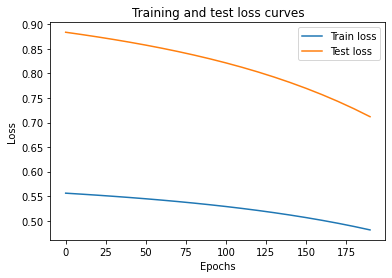

In [93]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

The **loss curves** show the loss diminishing over time. Remember, loss is a measure of how wrong the model is, so the lower the better.

In [94]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5545])), ('bias', tensor([0.4594]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Our model got very close to calculate the exact original values for `weight` and `bias` (and it would probably get even closer if we trained it for longer).

## 4. Making predictions with a trained PyTorch model (inference)

Our model is trained and we want to make predictions with it.

There are three things to keep in mind when making predictions (AKA performing inference) with a PyTorch model:

1. Set the model in evaluation mode (`model.eval()`.

2. Make the predictions using the inference mode context manager(`with torch.inference_mode(): ...`).

3. All predictionsshould be made with objects on the same device(i.e data & model on GGPU only or data and model on CPU only).

In [95]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calcs are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model
  # are on the CPU by default.
  # model_0.to(device)
  # x_test = x_test.to(device)
  y_preds = model_0(x_test)
y_preds

tensor([[0.2038],
        [0.2089],
        [0.2140],
        [0.2191],
        [0.2242],
        [0.2293],
        [0.2344],
        [0.2395],
        [0.2446],
        [0.2497]])

We can visualize the predictions we just made with our trained model

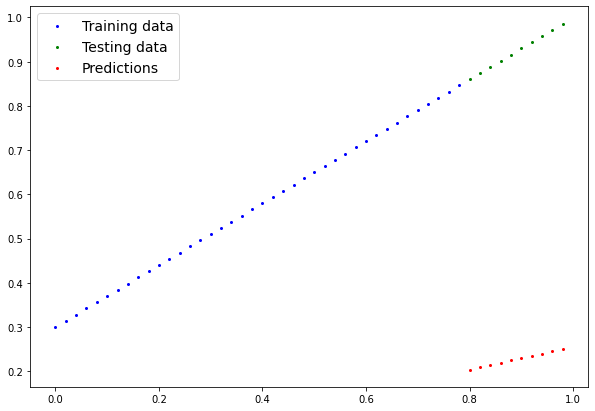

In [96]:
plot_predictions(predictions=y_preds)


## 5. Saving and loading a PyTorch model

The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

### Saving a PyTorch model's `state_dict()`

We can do this in the following steps:

1. We'll create a directory for saving models using Python's `pathlib` module.

2. We'll create a file path to save the model to.

3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

In [97]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [98]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Jan 19 22:10 models/01_pytorch_workflow_model_0.pth


## Loading a saved PyTorch model's `state_dict()`



We'll test out our model by using the flexible method of saving and loading the `state_dict()` and comparing it with another instance of 'LinearRegressionModel()` which has `load_state_dit()` as an in-built method.

In [99]:
# Intantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

Let's perform inference on our test data with our loaded model to verify if our model performs as expected.

In [100]:
# 1. Put the dedmodel into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test) # perform a forward pass on the test data with the loaded model

Let's check if the predictions we've made with the loaded model matches the previous predictions.

In [101]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

We verify that the model predictions are the same as the previous model predictions(predictions made prior to saving). This indicates our model is saving and loading as expected.

#6. Recap
## Let's put everything we've done so far together

In [102]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1+cu116'

We can make our code device agnostic by setting `device="cuda"` if it is available, otherwise it'll default to `device="cpu"`.

In [103]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

Let's create some data.

We'll hard code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our x values.

Finally, we'll use the x values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * x + bias`).

In [104]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create x and y (features and labels)
x = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors wil happen later on (shapes within linear layers)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

We'll split our newly created data into an '80/20 split' with 80% training data and 20% testing data.

In [105]:
# Split data
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

we'll visualize our split data to ensure they look right.

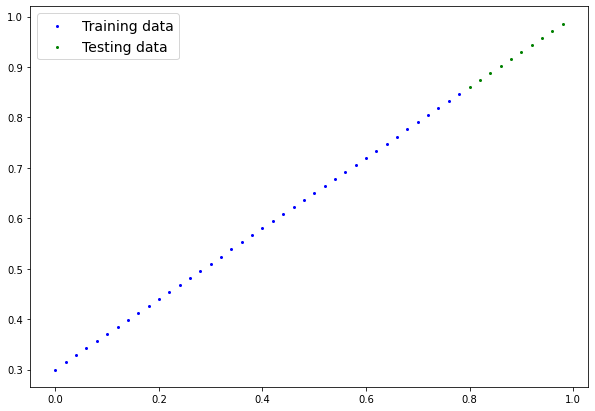

In [106]:
plot_predictions(x_train, y_train, x_test, y_test)

### 6.2 Building a PyTorch linear model

With our data, we'll create the same style of model as before except this timewe'll use `nn.Linear(in_features, out_features)` to define the weight and bias parameters of our model instead of doing it manually using `nn.Parameter()`.

In [107]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but... )
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [108]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [109]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or cpu if not
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

We'll build a training and testing loop at this point. We'll need a loss function and an optimizer to achieve this.

We'll use the same functions we used earlier, `nn.L1Loss()` and `torch.optim.SGD()`.

We'll have to pass the new model's parameters (`model.parameters()`) to the optimizer for it to adjust them during training.

We'll use a learning rate of `0.1` since it worked well the last time around.

In [110]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                              lr=0.01)

With our loss function and optimizer ready, we can proceed to train and evaluate our model using a training and testing loop.

In [111]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
#without this, errors will happen
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ###Training
  model_1.train() #train mode is the default after construction

  # 1. Forward pass
  y_pred = model_1(x_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval() # put the model in evaluation mode for testing (inference)
  # 1. Forward pass
  with torch.inference_mode():
    test_pred = model_1(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


The loss looks pretty low.

We'll check the parameters our model has learned and compare them to the original parameters we hard coded in this next step.

In [112]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print
print("The model learned the following values for weights and biases:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and biases are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and biases:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and biases are:
weights: 0.7, bias: 0.3


### 6.4 Making predictions

Now we've got a trained model, let's turn on it's evaluation mode and make some predictions.

In [113]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

Now let's plot our model's predictions

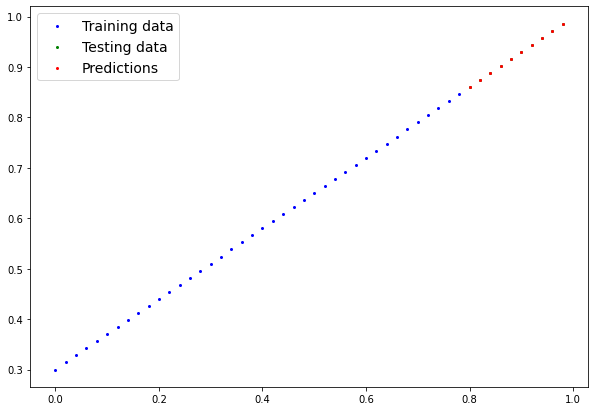

In [114]:
# plot_predictions(predictions=y_preds) # -> won't work ... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

Observe how the red dots line up almost perfectly with the green dots.

### 6.5 Saving and loading a model

Let's try to save our model & it's predictions so we can use it later.

In [115]:
#from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


Let's load it back in to make sure everything works well.
To do this we'll:



*   Create a new instance of the `LinearRegressionModelV2()` class
*   Load in the model state dict using `torch.nn.Module.load_state_dict()`
*   Send the new instance of the model to the target device(to ensure our code is device-agnostic)

In [116]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on a GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


Now we can evaluate the loaded model to see if its predictions line up with the predictions made prior to saving.

In [117]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Everything adds up. We've built and trained our first two neural network models in PyTorch!!

# PyTorch Neural Network Classification

A classification problem involves predicting whether something is one thing or another. In other words, taking a set of inputs and predicting what class those set of inputs belong to.


**Prob Type**..........**What is it?**..............................**Example**

**Binary**.................Target can be one of two......Predict whether or not.     
**classification**......options, e.g. yes or no..........someone has heart disease
                                                   based on their health 
                                                   parameters

**Multi-class**.........Target can be one of more.....Predict whether a photo is of

**classification**......than two options....................food, a person or a dog.

**Multi-label**..........Target can be assigned..........Predict what categories

**classification**.......more than one option............should be assigned to a 
                                                   Wikipedia article.

## 1. Make classification data and get it ready

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different colored dots.

In [118]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same vals.

Let's view the first 5 `X` and `y` values.

In [119]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Notice how we have two `X` values per one `y` value.

In [120]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


We can notice how each pair of `X` features (`X1` and `X2`) has a label(`y`) value of either 0 or 1.
This tells us that our problem is a binary classification since there are only two options (0 or 1).
Let's figure out how many values of each class there are.

In [121]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

It turns out there are 500 each. We'll go ahead & plot them.

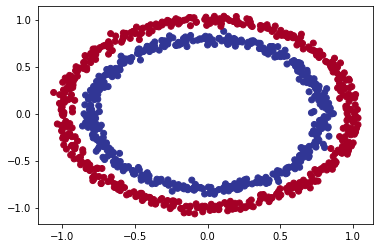

In [122]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In our subsequent steps, we're going to find out how we could build a PyTorch neural network to classify dots into red(0) or blue(1).

### 1.1 Input and output shape

In [123]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

We have a match on the first dimension of each. There are 1000 `X` and 1000 `y`.
We need to figure out the second dimension on `X` by viewing the values and shapes of our single sample (features and labels).

In [124]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


This tells us the second dimension for `X` has two features(it is a vector) whereas `y` has a single feature(it is a scalar).
We have two inputs for one output.

### 1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

We'll need to:

1. Turn our data into tensors (rcurrently our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).

2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).


In [125]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

Our data is now in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function `train_test_split()` from Scikit_Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [126]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 20% train
                                                    random_state=42) # make the random split reproducible
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

So we now have 800 training samples and 200 testing samples.

## 2. Building a model

To build our model we need to do the following steps:

1. Set up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Construct a model by subclassing `nn.module`.
3. Define a loss function and optimizer.
4. Create a training loop(we'll do this in the next section).

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [127]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

We want to create a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

i.e. given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as **supervised learning** because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes `X` and `y`.

Let's create a model class that:L

1. Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
2. Create 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
3. Defines a `forward()` method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target `device`.

In [128]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

  # 3. Define a forward method containing the forward pass computation
  def forward(self, x):
      # Return the output of layer_2, a single feature, the same shape as y
      return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [129]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Notice how this looks much simpler than subclassing `nn.Module`, why not just always use `nn.Sequentisl`?

`nn.Sequential` is great for straight-forward computations but it always runs in sequential order. If an alternate computation method is required, we'd want to define our own custom `nn.module` subclass.

Now we've got a model, let's see what happens when we pass some data through it.

In [130]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.6114],
        [0.6168],
        [0.5807],
        [0.6201],
        [0.5544],
        [0.5579],
        [0.5939],
        [0.5800],
        [0.5819],
        [0.6168]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Different problem types require different loss functions. For instance, a regression problem(predicting a number) might require mean absolute error(MAE) loss. Binary classification problems (like this one) often require binary cross entropy as the loss function.
The same optimizer function can often be used across different problem spaces. For instance, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, so can the Adam optimizer(`torch.optim.Adam()`).

Since we're working with binary classification problem, let's use a binary cross entropy loss function.

PyTorch has two binary cross entropy implementations:

1. `torch.nn.BCELoss()` - Creates a loss function that measures the binary cross entropy between the target (label) and input(features).
2. `torch.nn.BCEWithLogitsLoss()` - This is the same as above except it has a sigmoid layer (`nn.Sigmoid`) built-in (we'll see what this means soon).

Generally implementation 2 is the better option as it is more stable. We'll go ahead and create a loss function and an optimizer.

FOr the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.



In [131]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built - in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

We'll create an **evaluation metric** in the next step. An evaluation metric can be used to offer another perspective on how a model is functioning. While a loss function measures the wrogness of a model, the evaluation metrics measures how right it is. While several evaluation metrics are appropriate for classification problems, we'll start with **accuracy**.

Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.

In [132]:
# Calculate accuracy (a classifiication metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

We can now use this function whilst training our model to measure it's performance alongside the loss.

## 3. Train model

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [133]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.6114],
        [0.6168],
        [0.5807],
        [0.6201],
        [0.5544]], device='cuda:0', grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random. They're the output of our `forward()` method which implements two layers of `nn.Linear()` which internally calls the following equation:
              ** *y = x * Weights + bias* **

The raw outputs (unmodified) of this equation (y) and in turn, the raw outputs of our model are often referred to as logits. Our model above outputs logits when it takes in the input data(x in the equation or `X_test` in the code). 
We can use the **sigmoid activation function** to get our model's raw outputs(logits) into a numerical form thats comparable to our truth labels.

In [134]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6483],
        [0.6495],
        [0.6412],
        [0.6502],
        [0.6352]], device='cuda:0', grad_fn=<SigmoidBackward0>)

While our outputs are still random, they now have some consistency as they are now in the form of **predictio probabilities**, i.e. `y_pred_probs`. The values are a representation of how much the model thinks the data point belongs to one class or another.
Wince we're dealing with a binary classification, our ideal outputs are 0 or 1. These values are our decision boundary.



*   If `y_pred_probs` >= 0.5, `y=1` (class 1)
*   If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilities into prediction labels, we can round the outputs of the sigmoiud activation function.



In [135]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

We observe how our model's predictions are now in the same form as our truth tables (`y_test`).

In [136]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

THis means we'll be able to compare our models predictions to the test labelks to see how well it's going.

To recap, we converted our model's raw outputs(logits) to prediction probabilities using a sigmoid function.
We then converted the prediction to prediction labels by rounding them.

**Note** The use of the sigmoid activation function is often only for binary classification logits.
For multi-class classification, we'll use the softmax activation function (this will come later on).

### 3.2 Building a training and testing loop

---

In the previous tep we converted our raw model outputs into predictioin labels, in this step we'll build a training loop.

Let's start by training for 100 epochs and outputting the model's progress every 10 epochs.


In [137]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass (model outputs raw logits)
  y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimension, this won't work unless the model & data are on the same device
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

  # 2 Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
  #               y_train)
  loss = loss_fn(y_logits, # Using BCEWithitsLoss works with raw logits
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print out what's happeening every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73502, Accuracy: 50.00% | Test loss: 0.73273, Test acc: 50.00%
Epoch: 10 | Loss: 0.71197, Accuracy: 50.00% | Test loss: 0.71086, Test acc: 50.00%
Epoch: 20 | Loss: 0.70210, Accuracy: 50.00% | Test loss: 0.70152, Test acc: 50.00%
Epoch: 30 | Loss: 0.69767, Accuracy: 50.00% | Test loss: 0.69740, Test acc: 50.00%
Epoch: 40 | Loss: 0.69556, Accuracy: 50.00% | Test loss: 0.69551, Test acc: 50.00%
Epoch: 50 | Loss: 0.69450, Accuracy: 50.00% | Test loss: 0.69463, Test acc: 50.00%
Epoch: 60 | Loss: 0.69393, Accuracy: 57.25% | Test loss: 0.69421, Test acc: 56.50%
Epoch: 70 | Loss: 0.69360, Accuracy: 56.38% | Test loss: 0.69401, Test acc: 52.50%
Epoch: 80 | Loss: 0.69339, Accuracy: 53.37% | Test loss: 0.69392, Test acc: 53.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 52.88% | Test loss: 0.69390, Test acc: 51.00%


Our model seems to have gone through the training and testing steps okay but the results don't seem to have improved much. The accuracy barely moves above 50% on each data split.
Since we are working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

## 4. Make predictions and evaluate the model

It looks like our model is guessing randomly. Let's visualize our model by plotting our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 and class 1.

We'll write some code to download and import the `helper_functions.py script` from the `Learn PyTorch for Deep Learning repo`.
We'll also import `plot_predictions()`.

In [138]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


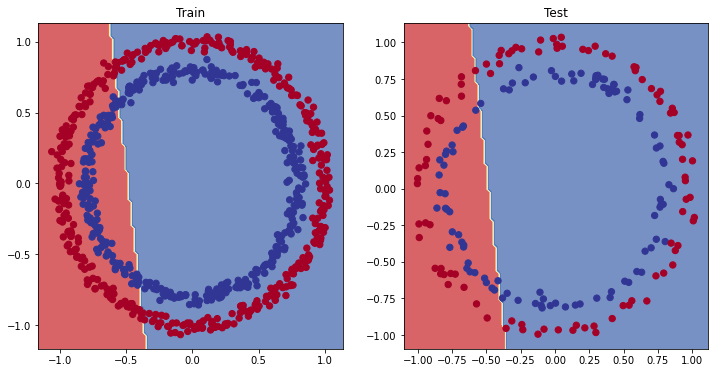

In [139]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


Our model appears to be underfitting, meaning it is not learning predictive patterns from the data. It's currently trying to split the red and blue dots using a straight line and this does not work since our data is circular, a straight line can at best cut it down the middle. We'll try and improve this in the following steps.

## 5. Improving a model

Let's try to improve our model's underfitting problem. There are several model improvement techniques we could consider.

We could:

**Add more layers.** Make the neural network deeper

**Add more hidden units.** Make the  neural network wider

**Use longer epochs(fit for longer)** Give model more opportunities to look at the data

**Change the activation function.** Use non-linear activation functions

**Change the learning rate.** caliberate the learning rate appropriately to arrive at an acceptable learning outcome

**Change the loss function** Select the appropriate loss functioin for the data type

**Use transfer learning.** TAke a pretrained model from a problem domain similar to yours and adjust it to your own problem.

All of these are adjustable by hand and are referred to as **Hyperparameters**.

Let's try to improve our model using the same staeps as above with a few changed hyperparameters. We'll add an extra layer to our model, fit our model for longer epochs(`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

In [140]:
class CircleModelV1(nn.Module):
    def __init__(self):
      super().__init__()
      self.layer_1 = nn.Linear(in_features=2, out_features=10)
      self.layer_2 = nn.Linear(in_features=10, out_features=10) #extra layer
      self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, X):
      return self.layer_3(self.layer_2(self.layer_1(X)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

With our model setup, we'll recreate a loss function and an optimizer instance using the same settings as before.

In [141]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

We've set up our model, optimizer and loss function. We'll go ahead and set up a training loop in the next step.

In [142]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### TRaining
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. Calculate loss/accuracy
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
      
      # Print out what's happening every 10 epochs
      if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    
    

Epoch: 0 | Loss: 0.69396, accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


Training the model for longer and adding an extra layer did not yield noteworthy improvements. Our model did not learn any patterns better than random guessing.

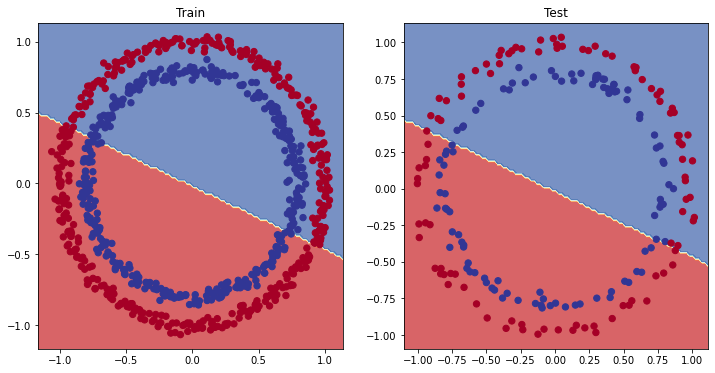

In [143]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

We visualize our model and observe it is still drawing a straight li8ne between the blue & red dots. We'll create some linear data in the next step to see if our model can learn from linear data instead.

### 5.1 Preparing data to see if our model can model a straight line

Let us create some linear data to see if our model is able to model it

In [145]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:15], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

We'll split our data into training and test sets in the next step.

In [151]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each split
print(len(X_train_regression),
      len(y_train_regression),
      len(X_test_regression),
      len(y_test_regression))

80 80 20 20


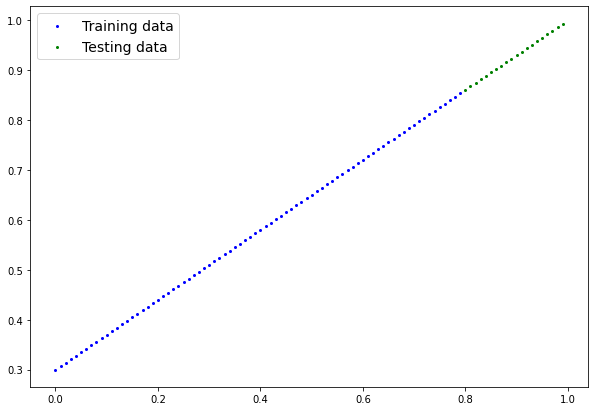

In [152]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression
);